In [ ]:
!pip install aif360
%matplotlib inline
# Load all necessary packages
import sys
sys.path.append("../")
from aif360.datasets import BinaryLabelDataset
from aif360.datasets import StandardDataset
from aif360.metrics import BinaryLabelDatasetMetric
from aif360.metrics import ClassificationMetric
from aif360.metrics.utils import compute_boolean_conditioning_vector

from aif360.algorithms.preprocessing.optim_preproc_helpers.data_preproc_functions import load_preproc_data_adult, load_preproc_data_compas, load_preproc_data_german

from aif360.algorithms.inprocessing.adversarial_debiasing import AdversarialDebiasing

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MaxAbsScaler
from sklearn.metrics import accuracy_score

from IPython.display import Markdown, display
import matplotlib.pyplot as plt

import tensorflow.compat.v1 as tf
tf.disable_eager_execution()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.7/259.7 kB 4.6 MB/s eta 0:00:00


pip install 'aif360[Reductions]'
pip install 'aif360[Reductions]'
pip install 'aif360[inFairness]'
pip install 'aif360[Reductions]'


##Loading dataset

In [ ]:
import pandas as pd
# Load the dataset
df = pd.read_csv('/content/cardio_train.csv', delimiter=';')
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


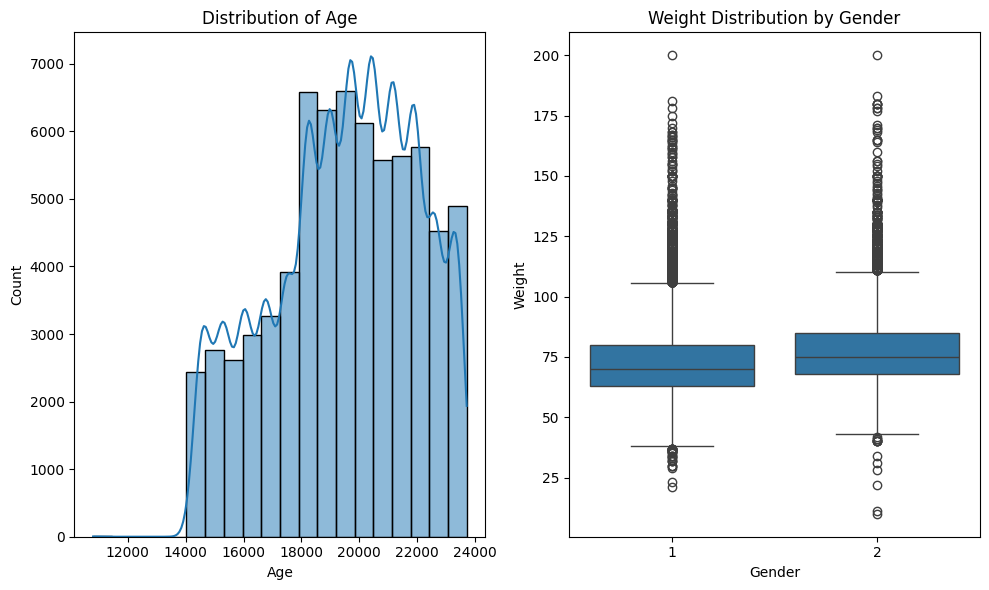

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
#Histogram of Age and Boxplot of Weight by Gender
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['age'], bins=20, kde=True)
plt.xlabel('Age')
plt.title('Distribution of Age')

plt.subplot(1, 2, 2)
sns.boxplot(x='gender', y='weight', data=df)
plt.xlabel('Gender')
plt.ylabel('Weight')
plt.title('Weight Distribution by Gender')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Define privileged and unprivileged groups based on 'gender'
privileged_groups = [{'gender': 1}]  # 1 represents the privileged group
unprivileged_groups = [{'gender': 2}]  # 2 represents the unprivileged group

In [ ]:
# df_train will contain 70% of the data, and df_test will contain 30%
df_train, df_test = train_test_split(df, test_size=0.3, random_state=42)

In [ ]:
from IPython.display import display, Markdown

# Assuming df_train and df_test are already defined and used in your project

# Print out the shape of the training dataset
display(Markdown("#### Training Dataset shape"))
print(df_train.shape)

# Assuming 'gender' is your protected attribute
protected_attribute = 'gender'

# Print out the protected attribute names
display(Markdown("#### Protected attribute names"))
print(protected_attribute)

#display group

display(Markdown("#### Privileged and unprivileged protected attribute values"))
print("Privileged:", privileged_groups)
print("Unprivileged:", unprivileged_groups)

# Print out the dataset feature names excluding the protected attribute and labels
display(Markdown("#### Dataset feature names"))
features_list = df_train.columns.tolist()
features_list.remove(protected_attribute)  # Remove protected attribute from feature list
features_list.remove('cardio')  # Remove labels from feature list
print(features_list)


#### Training Dataset shape

(49000, 13)


#### Protected attribute names

gender


#### Privileged and unprivileged protected attribute values

Privileged: [{'gender': 1}]
Unprivileged: [{'gender': 2}]


#### Dataset feature names

['id', 'age', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']


In [ ]:
#cardio is the label column (1 for positive outcome, 0 for negative outcome)
favorable_label = 1  # Define the favorable label
unfavorable_label = 0  # Define the unfavorable label

In [ ]:
# Convert the DataFrame into a BinaryLabelDataset
df_train = BinaryLabelDataset(df=df_train, label_names=['cardio'],
                                        favorable_label=favorable_label,
                                        unfavorable_label=unfavorable_label,
                                        protected_attribute_names=['gender'],
                                        privileged_protected_attributes=[[1]],  # Assuming 1 is the privileged group for gender
                                        unprivileged_protected_attributes=[[2]])  # Assuming 2 is the unprivileged group for gender

## Metric for the original training dataset

In [ ]:
# Metric for the original training dataset
metric_train = BinaryLabelDatasetMetric(df_train,
                                             unprivileged_groups=unprivileged_groups,
                                             privileged_groups=privileged_groups)
display(Markdown("#### Original training dataset"))
print("Train set: Difference in mean outcomes between unprivileged and privileged groups = %f" % metric_train.mean_difference())

#### Original training dataset

Train set: Difference in mean outcomes between unprivileged and privileged groups = 0.006819


In [ ]:
# Convert the DataFrame into a BinaryLabelDataset for the test dataset
df_test = BinaryLabelDataset(df=df_test, label_names=['cardio'],
                                       favorable_label=favorable_label,
                                       unfavorable_label=unfavorable_label,
                                       protected_attribute_names=['gender'],
                                       privileged_protected_attributes=[[1]],  # Assuming 1 is the privileged group for gender
                                       unprivileged_protected_attributes=[[2]])  # Assuming 2 is the unprivileged group for gender


# Metric for the original test dataset
metric_test = BinaryLabelDatasetMetric(df_test,
                                       unprivileged_groups=unprivileged_groups,
                                       privileged_groups=privileged_groups)
display(Markdown("#### Original test dataset"))
print("Test set: Difference in mean outcomes between unprivileged and privileged groups = %f" % metric_test.mean_difference())

#### Original test dataset

Test set: Difference in mean outcomes between unprivileged and privileged groups = 0.012435


In [ ]:
# Scale the features of the training dataset
min_max_scaler = MaxAbsScaler()
df_train.features = min_max_scaler.fit_transform(df_train.features)

# Scale the features of the test dataset using the same scaler as the training dataset
df_test.features = min_max_scaler.transform(df_test.features)

# Compute fairness metrics for the scaled training dataset
metric_scaled_train = BinaryLabelDatasetMetric(df_train,
                                               unprivileged_groups=unprivileged_groups,
                                               privileged_groups=privileged_groups)

# Display fairness metrics for the scaled training dataset
display(Markdown("#### Scaled dataset - Verify that the scaling does not affect the group label statistics"))
print("Train set: Difference in mean outcomes between unprivileged and privileged groups = %f" % metric_scaled_train.mean_difference())

# Compute fairness metrics for the scaled test dataset
metric_scaled_test = BinaryLabelDatasetMetric(df_test,
                                              unprivileged_groups=unprivileged_groups,
                                              privileged_groups=privileged_groups)

# Display fairness metrics for the scaled test dataset
print("Test set: Difference in mean outcomes between unprivileged and privileged groups = %f" % metric_scaled_test.mean_difference())


#### Scaled dataset - Verify that the scaling does not affect the group label statistics

Train set: Difference in mean outcomes between unprivileged and privileged groups = 0.006819
Test set: Difference in mean outcomes between unprivileged and privileged groups = 0.012435


### Learn plan classifier without debiasing

In [ ]:
# Load post-processing algorithm that equalizes the odds
# Learn parameters with debias set to False
sess = tf.Session()
plain_model = AdversarialDebiasing(privileged_groups = privileged_groups,
                          unprivileged_groups = unprivileged_groups,
                          scope_name='plain_classifier',
                          debias=False,
                          sess=sess)

In [ ]:
plain_model.fit(df_train)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


epoch 0; iter: 0; batch classifier loss: 0.705774
epoch 0; iter: 200; batch classifier loss: 0.697726
epoch 1; iter: 0; batch classifier loss: 0.652628
epoch 1; iter: 200; batch classifier loss: 0.656586
epoch 2; iter: 0; batch classifier loss: 0.659940
epoch 2; iter: 200; batch classifier loss: 0.670499
epoch 3; iter: 0; batch classifier loss: 0.645057
epoch 3; iter: 200; batch classifier loss: 0.640547
epoch 4; iter: 0; batch classifier loss: 0.600395
epoch 4; iter: 200; batch classifier loss: 0.607175
epoch 5; iter: 0; batch classifier loss: 0.638862
epoch 5; iter: 200; batch classifier loss: 0.622795
epoch 6; iter: 0; batch classifier loss: 0.668516
epoch 6; iter: 200; batch classifier loss: 0.632645
epoch 7; iter: 0; batch classifier loss: 0.634552
epoch 7; iter: 200; batch classifier loss: 0.615740
epoch 8; iter: 0; batch classifier loss: 0.581002
epoch 8; iter: 200; batch classifier loss: 0.628031
epoch 9; iter: 0; batch classifier loss: 0.628140
epoch 9; iter: 200; batch classi

In [ ]:
# Apply the plain model to test data
dataset_nodebiasing_train = plain_model.predict(df_train)
dataset_nodebiasing_test = plain_model.predict(df_test)

In [ ]:
# Metrics for the dataset from plain model (without debiasing)
display(Markdown("#### Plain model - without debiasing - dataset metrics"))
metric_dataset_nodebiasing_train = BinaryLabelDatasetMetric(dataset_nodebiasing_train,
                                             unprivileged_groups=unprivileged_groups,
                                             privileged_groups=privileged_groups)

print("Train set: Difference in mean outcomes between unprivileged and privileged groups = %f" % metric_dataset_nodebiasing_train.mean_difference())

metric_dataset_nodebiasing_test = BinaryLabelDatasetMetric(dataset_nodebiasing_test,
                                             unprivileged_groups=unprivileged_groups,
                                             privileged_groups=privileged_groups)

print("Test set: Difference in mean outcomes between unprivileged and privileged groups = %f" % metric_dataset_nodebiasing_test.mean_difference())

display(Markdown("#### Plain model - without debiasing - classification metrics"))
classified_metric_nodebiasing_test = ClassificationMetric(df_test,
                                                 dataset_nodebiasing_test,
                                                 unprivileged_groups=unprivileged_groups,
                                                 privileged_groups=privileged_groups)
print("Test set: Classification accuracy = %f" % classified_metric_nodebiasing_test.accuracy())
TPR = classified_metric_nodebiasing_test.true_positive_rate()
TNR = classified_metric_nodebiasing_test.true_negative_rate()
bal_acc_nodebiasing_test = 0.5*(TPR+TNR)
print("Test set: Balanced classification accuracy = %f" % bal_acc_nodebiasing_test)
print("Test set: Disparate impact = %f" % classified_metric_nodebiasing_test.disparate_impact())
print("Test set: Equal opportunity difference = %f" % classified_metric_nodebiasing_test.equal_opportunity_difference())
print("Test set: Average odds difference = %f" % classified_metric_nodebiasing_test.average_odds_difference())
print("Test set: Theil_index = %f" % classified_metric_nodebiasing_test.theil_index())

#### Plain model - without debiasing - dataset metrics

Train set: Difference in mean outcomes between unprivileged and privileged groups = -0.012606
Test set: Difference in mean outcomes between unprivileged and privileged groups = -0.008421


#### Plain model - without debiasing - classification metrics

Test set: Classification accuracy = 0.715286
Test set: Balanced classification accuracy = 0.715403
Test set: Disparate impact = 0.982165
Test set: Equal opportunity difference = -0.011028
Test set: Average odds difference = -0.013811
Test set: Theil_index = 0.213794


### Apply in-processing algorithm based on adversarial learning

In [ ]:
sess.close()
tf.reset_default_graph()
sess = tf.Session()

In [ ]:
# Learn parameters with debias set to True
debiased_model = AdversarialDebiasing(privileged_groups = privileged_groups,
                          unprivileged_groups = unprivileged_groups,
                          scope_name='debiased_classifier',
                          debias=True,
                          sess=sess)

In [ ]:
debiased_model.fit(df_train)

epoch 0; iter: 0; batch classifier loss: 0.697589; batch adversarial loss: 0.657995
epoch 0; iter: 200; batch classifier loss: 1.221305; batch adversarial loss: 0.534498
epoch 1; iter: 0; batch classifier loss: 1.494440; batch adversarial loss: 0.378727
epoch 1; iter: 200; batch classifier loss: 1.791937; batch adversarial loss: 0.279355
epoch 2; iter: 0; batch classifier loss: 1.634882; batch adversarial loss: 0.137710
epoch 2; iter: 200; batch classifier loss: 1.895568; batch adversarial loss: 0.069582
epoch 3; iter: 0; batch classifier loss: 2.027255; batch adversarial loss: -0.067704
epoch 3; iter: 200; batch classifier loss: 2.815264; batch adversarial loss: -0.079274
epoch 4; iter: 0; batch classifier loss: 2.844057; batch adversarial loss: -0.214732
epoch 4; iter: 200; batch classifier loss: 2.640095; batch adversarial loss: -0.285088
epoch 5; iter: 0; batch classifier loss: 2.667764; batch adversarial loss: -0.420371
epoch 5; iter: 200; batch classifier loss: 3.011271; batch ad

In [ ]:
# Apply the plain model to test data
dataset_debiasing_train = debiased_model.predict(df_train)
dataset_debiasing_test = debiased_model.predict(df_test)

In [ ]:
# Metrics for the dataset from plain model (without debiasing)
display(Markdown("#### Plain model - without debiasing - dataset metrics"))
print("Train set: Difference in mean outcomes between unprivileged and privileged groups = %f" % metric_dataset_nodebiasing_train.mean_difference())
print("Test set: Difference in mean outcomes between unprivileged and privileged groups = %f" % metric_dataset_nodebiasing_test.mean_difference())

# Metrics for the dataset from model with debiasing
display(Markdown("#### Model - with debiasing - dataset metrics"))
metric_dataset_debiasing_train = BinaryLabelDatasetMetric(dataset_debiasing_train,
                                             unprivileged_groups=unprivileged_groups,
                                             privileged_groups=privileged_groups)

print("Train set: Difference in mean outcomes between unprivileged and privileged groups = %f" % metric_dataset_debiasing_train.mean_difference())

metric_dataset_debiasing_test = BinaryLabelDatasetMetric(dataset_debiasing_test,
                                             unprivileged_groups=unprivileged_groups,
                                             privileged_groups=privileged_groups)

print("Test set: Difference in mean outcomes between unprivileged and privileged groups = %f" % metric_dataset_debiasing_test.mean_difference())



display(Markdown("#### Plain model - without debiasing - classification metrics"))
print("Test set: Classification accuracy = %f" % classified_metric_nodebiasing_test.accuracy())
TPR = classified_metric_nodebiasing_test.true_positive_rate()
TNR = classified_metric_nodebiasing_test.true_negative_rate()
bal_acc_nodebiasing_test = 0.5*(TPR+TNR)
print("Test set: Balanced classification accuracy = %f" % bal_acc_nodebiasing_test)
print("Test set: Disparate impact = %f" % classified_metric_nodebiasing_test.disparate_impact())
print("Test set: Equal opportunity difference = %f" % classified_metric_nodebiasing_test.equal_opportunity_difference())
print("Test set: Average odds difference = %f" % classified_metric_nodebiasing_test.average_odds_difference())
print("Test set: Theil_index = %f" % classified_metric_nodebiasing_test.theil_index())



display(Markdown("#### Model - with debiasing - classification metrics"))
classified_metric_debiasing_test = ClassificationMetric(df_test,
                                                 dataset_debiasing_test,
                                                 unprivileged_groups=unprivileged_groups,
                                                 privileged_groups=privileged_groups)
print("Test set: Classification accuracy = %f" % classified_metric_debiasing_test.accuracy())
TPR = classified_metric_debiasing_test.true_positive_rate()
TNR = classified_metric_debiasing_test.true_negative_rate()
bal_acc_debiasing_test = 0.5*(TPR+TNR)
print("Test set: Balanced classification accuracy = %f" % bal_acc_debiasing_test)
print("Test set: Disparate impact = %f" % classified_metric_debiasing_test.disparate_impact())
print("Test set: Equal opportunity difference = %f" % classified_metric_debiasing_test.equal_opportunity_difference())
print("Test set: Average odds difference = %f" % classified_metric_debiasing_test.average_odds_difference())
print("Test set: Theil_index = %f" % classified_metric_debiasing_test.theil_index())

#### Plain model - without debiasing - dataset metrics

Train set: Difference in mean outcomes between unprivileged and privileged groups = -0.012606
Test set: Difference in mean outcomes between unprivileged and privileged groups = -0.008421


#### Model - with debiasing - dataset metrics

Train set: Difference in mean outcomes between unprivileged and privileged groups = -0.103546
Test set: Difference in mean outcomes between unprivileged and privileged groups = -0.104392


#### Plain model - without debiasing - classification metrics

Test set: Classification accuracy = 0.715286
Test set: Balanced classification accuracy = 0.715403
Test set: Disparate impact = 0.982165
Test set: Equal opportunity difference = -0.011028
Test set: Average odds difference = -0.013811
Test set: Theil_index = 0.213794


#### Model - with debiasing - classification metrics

Test set: Classification accuracy = 0.536905
Test set: Balanced classification accuracy = 0.538510
Test set: Disparate impact = 0.000000
Test set: Equal opportunity difference = -0.164803
Test set: Average odds difference = -0.104692
Test set: Theil_index = 0.604764


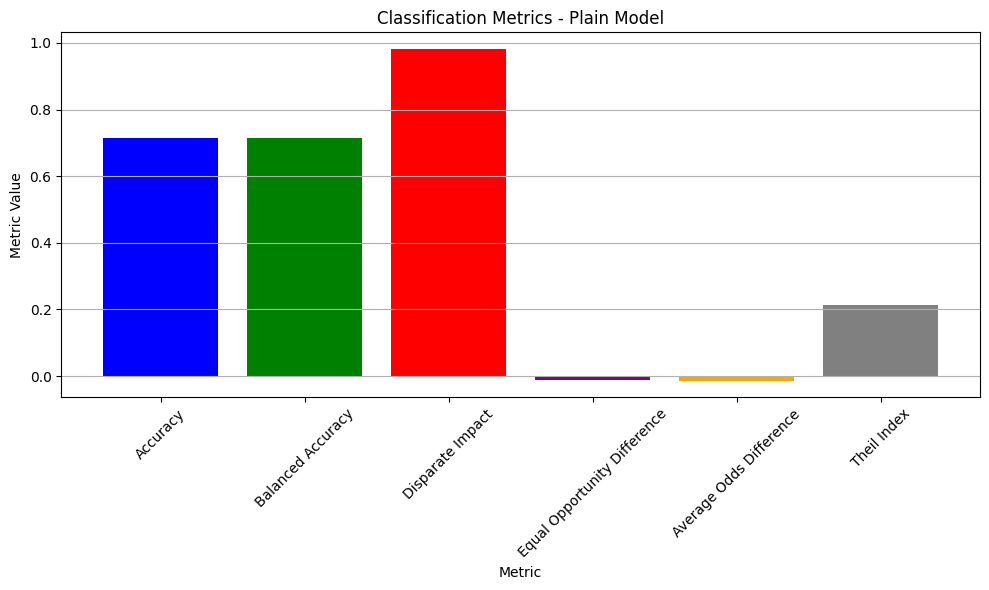

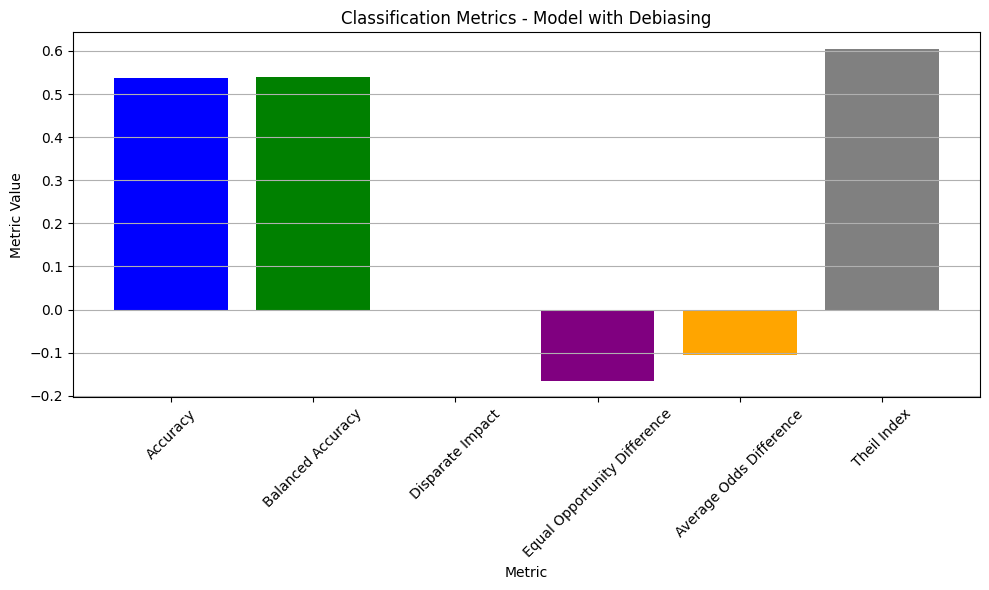

In [ ]:
# Define functions for plotting
def plot_difference_in_mean(train_metric, test_metric, title):
    plt.figure(figsize=(8, 6))
    plt.bar(['Train Set', 'Test Set'], [train_metric.mean_difference(), test_metric.mean_difference()], color=['blue', 'green'])
    plt.title(title)
    plt.ylabel('Difference in Mean Outcomes')
    plt.xlabel('Dataset')
    plt.ylim(0, 0.5)  # Adjust ylim as needed
    plt.grid(axis='y')
    plt.show()

def plot_classification_metrics(classified_metric, title):
    metrics = ['Accuracy', 'Balanced Accuracy', 'Disparate Impact', 'Equal Opportunity Difference', 'Average Odds Difference', 'Theil Index']
    values = [classified_metric.accuracy(), (classified_metric.true_positive_rate() + classified_metric.true_negative_rate()) / 2,
              classified_metric.disparate_impact(), classified_metric.equal_opportunity_difference(),
              classified_metric.average_odds_difference(), classified_metric.theil_index()]

    plt.figure(figsize=(10, 6))
    plt.bar(metrics, values, color=['blue', 'green', 'red', 'purple', 'orange', 'gray'])
    plt.title(title)
    plt.ylabel('Metric Value')
    plt.xlabel('Metric')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()



# Plotting the classification metrics for the plain model
plot_classification_metrics(classified_metric_nodebiasing_test, "Classification Metrics - Plain Model")

# Plotting the classification metrics for the model with debiasing
plot_classification_metrics(classified_metric_debiasing_test, "Classification Metrics - Model with Debiasing")